# 1 Framing the problem


### Nowadays, Airbnb is one of the most popular go-to platfroms we'd love to use when travel or vist many places across the world. US is a a large country where people live, work and travel to, and it has many listings in various regions on Airbnb.   
### Our use case is a regression task. We are interested in predicting the listing price of houses listed on Airbnb by using data about on each listing provided by Airbnb.

# 2 Data Acquisition

## 2.1 Notebook Setup

In [1]:
import sys
assert sys.version_info >= (3,5) # Python >= 3.5 is required

import sklearn 
assert sklearn.__version__ >= '0.20'# Scikit learn >= 0.20 is required

import numpy as np
import os 

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick',labelsize=12)


# Save the figure to the below path
PROJECT_ROOT_DIR = "." # Current working dir
ID = 'HW1_End_to_End_Project'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,'Image',ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
print(IMAGES_PATH)

./Image/HW1_End_to_End_Project


In [2]:
# Func to save the figures to a path
def save_fig (fig_id,fig_extension='png',resolution = 500):
    path = os.path.join(IMAGES_PATH,fig_id + "." + fig_extension)
    print('Save Figure: ', fig_id)
    plt.savefig(path,format = fig_extension, dpi = resolution)

## 2.2 Get the data

In [3]:
# from kaggle.api.kaggle_api_extended import KaggleApi
# import zipfile
# api = KaggleApi()
# api.authenticate()
# api.dataset_download_files('kritikseth/us-airbnb-open-data')
# zf = zipfile.ZipFile('us-airbnb-open-data.zip')
# #extracted data is saved in the same directory as notebook
# zf.extractall() 
# zf.close()

In [60]:
df=pd.read_csv('/Users/ziyezhang/Desktop/MMA/INSY695 Enterpr Analytics/HW1/AB_US_2020.csv')
df.head()
df = df[df.longitude >= -140] # Use only mainland US
df = df[df.price <= 1000] # 
df = df.drop(['id','host_id','name','host_name'],axis =1)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


# 3 Data Exploration

## Numeric Data Visualization

In [5]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,199743.000000,199743.000000,199743.000000,1.997430e+05,199743.000000,159009.000000,199743.000000,199743.000000
mean,37.297914,-97.216774,160.999409,5.112275e+02,35.989191,1.485514,13.242066,151.513550
std,5.017909,20.238534,151.249081,2.237506e+05,65.446348,1.726701,47.155502,140.246636
min,25.957440,-123.110830,0.000000,1.000000e+00,0.000000,0.010000,1.000000,0.000000
25%,34.030480,-118.319675,72.000000,1.000000e+00,1.000000,0.240000,1.000000,0.000000
50%,37.755240,-93.294900,114.000000,2.000000e+00,8.000000,0.860000,2.000000,112.000000
75%,40.739860,-73.998380,191.000000,7.000000e+00,41.000000,2.160000,5.000000,305.000000
max,47.734620,-70.995950,1000.000000,1.000000e+08,966.000000,44.060000,593.000000,365.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199743 entries, 0 to 226029
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neighbourhood_group             86542 non-null   object 
 1   neighbourhood                   199743 non-null  object 
 2   latitude                        199743 non-null  float64
 3   longitude                       199743 non-null  float64
 4   room_type                       199743 non-null  object 
 5   price                           199743 non-null  int64  
 6   minimum_nights                  199743 non-null  int64  
 7   number_of_reviews               199743 non-null  int64  
 8   last_review                     159009 non-null  object 
 9   reviews_per_month               159009 non-null  float64
 10  calculated_host_listings_count  199743 non-null  int64  
 11  availability_365                199743 non-null  int64  
 12  city            

In [7]:
df.neighbourhood_group.value_counts()

Manhattan               20030
Brooklyn                18209
City of Los Angeles     17087
Other Cities            11131
Queens                   5731
Unincorporated Areas     2489
Newport                  1357
Other neighborhoods      1252
Bronx                    1183
Washington               1175
Providence               1049
Downtown                 1041
Capitol Hill              682
Central Area              571
Queen Anne                454
West Seattle              378
Ballard                   369
Rainier Valley            355
Staten Island             325
Cascade                   266
Beacon Hill               252
University District       238
Delridge                  201
Northgate                 150
Magnolia                  131
Lake City                 118
Kent                      108
Bristol                   107
Seward Park                69
Interbay                   34
Name: neighbourhood_group, dtype: int64

In [8]:
df.neighbourhood.value_counts()

Unincorporated Areas    7878
Hollywood               4321
Williamsburg            3406
Hennepin                3396
Bedford-Stuyvesant      3365
                        ... 
North Kennedy Tract        1
Village De Lest            1
Elmhurst Park              1
Leona Valley               1
Gerritsen Beach            1
Name: neighbourhood, Length: 1419, dtype: int64

In [9]:
df.room_type.value_counts()

Entire home/apt    130597
Private room        63501
Shared room          3942
Hotel room           1703
Name: room_type, dtype: int64

In [10]:
df.last_review.value_counts()

15/03/20    2635
07/09/20    1972
23/08/20    1839
08/03/20    1802
30/08/20    1669
            ... 
13/04/14       1
10/06/14       1
09/07/14       1
23/06/15       1
12/08/12       1
Name: last_review, Length: 2367, dtype: int64

In [11]:
df.city.value_counts()

New York City        45478
Los Angeles          30707
San Diego            12077
Broward County       10554
Austin               10096
Clark County          8266
Washington D.C.       7238
San Clara Country     7012
San Francisco         6928
Seattle               6561
New Orleans           6363
Chicago               6348
Nashville             6050
Twin Cities MSA       5622
Portland              4266
Denver                4160
Rhode Island          3796
Boston                3330
Oakland               3182
San Mateo County      2834
Jersey City           2481
Asheville             2065
Santa Cruz County     1554
Columbus              1378
Cambridge             1026
Salem                  193
Pacific Grove          178
Name: city, dtype: int64

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>]], dtype=object)

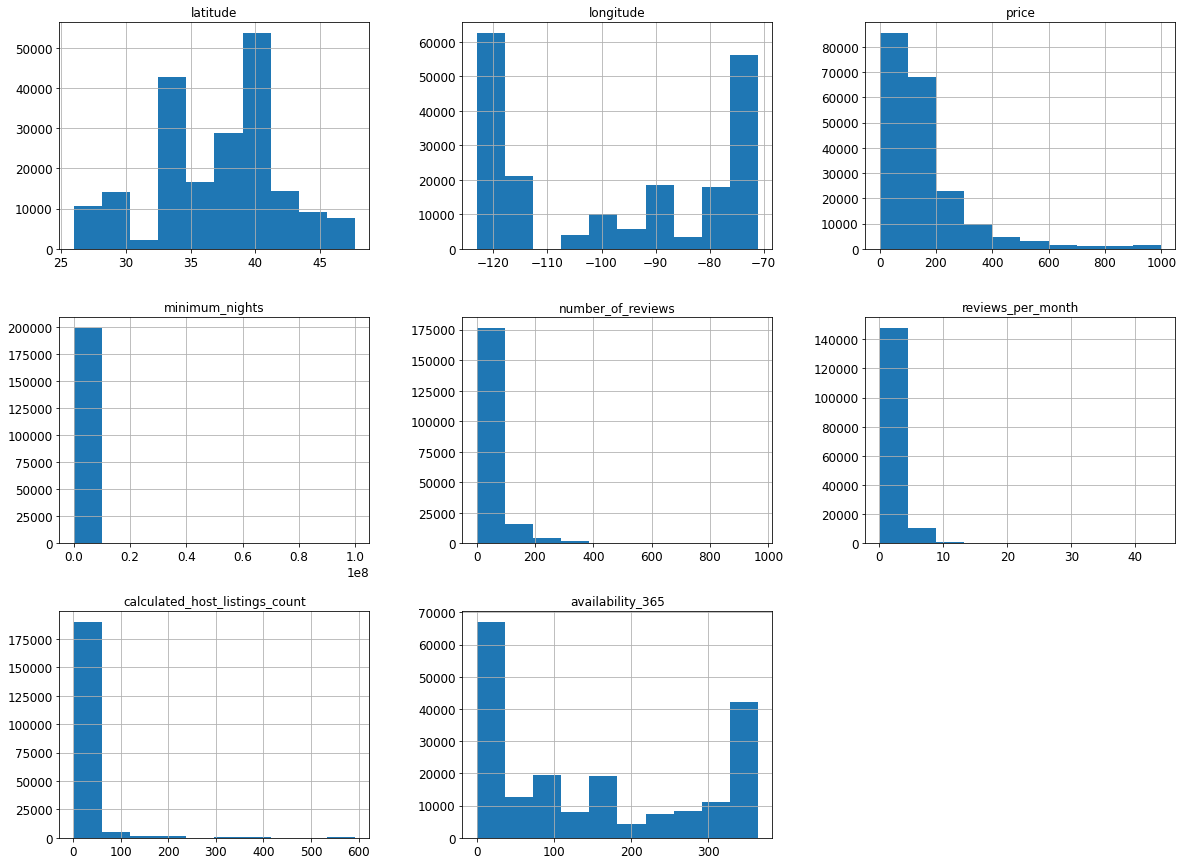

In [12]:
df.hist(figsize=(20,15))

In [13]:
df.price.sort_values(ascending=False).head()

17106     1000
213370    1000
213501    1000
222110    1000
18925     1000
Name: price, dtype: int64

<AxesSubplot:>

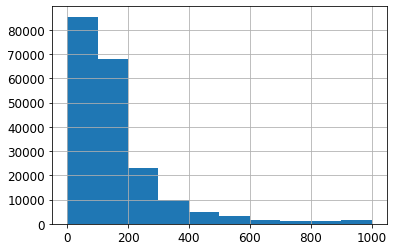

In [14]:
df.price.hist()

## 3.2 Visualizing Geographical Data

In [15]:
from sklearn.model_selection import train_test_split
# set seed to make this notebook's output identical at every run
train_set,test_set = train_test_split(df, test_size=0.2, random_state=5) 

train_set.head()
test_set.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
12212,NaN,78717,30.47723,-97.78519,Entire home/apt,80,30,0,NaN,NaN,593,301,Austin
94046,Other Cities,Long Beach,33.77641,-118.16856,Entire home/apt,97,2,61,03/09/20,4.03,1,296,Los Angeles
39959,NaN,Unincorporated Areas,36.11616,-115.16473,Private room,214,2,1,15/03/20,0.18,14,360,Clark County
95375,Other Cities,Santa Monica,34.02206,-118.49285,Entire home/apt,179,31,4,29/07/20,0.38,74,364,Los Angeles
148789,Queens,Ditmars Steinway,40.77253,-73.91476,Private room,125,7,9,31/10/19,0.55,1,365,New York City


In [16]:
airbnb = train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

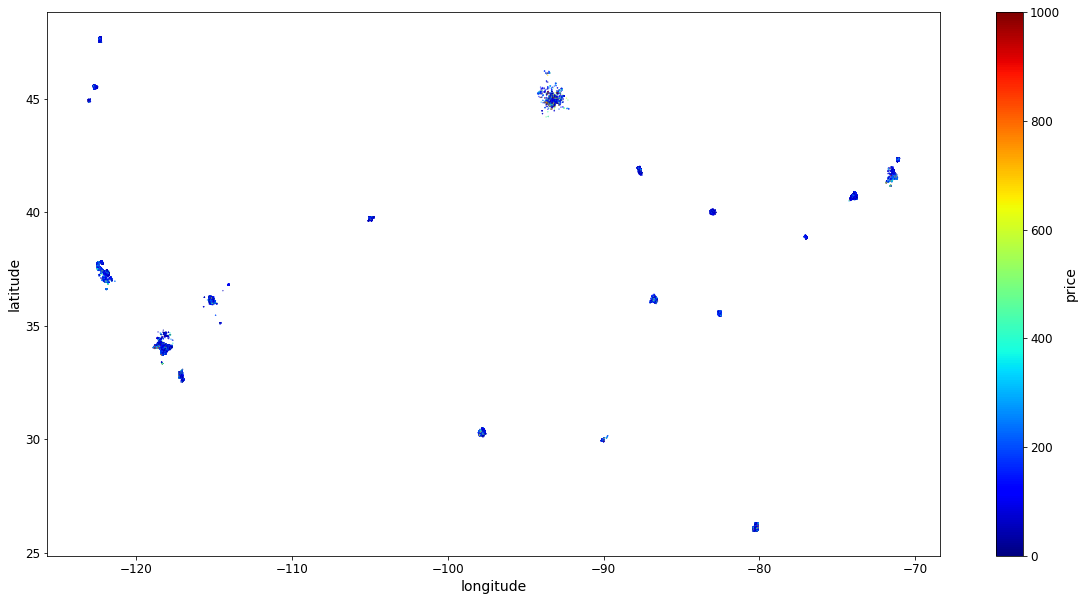

In [17]:
airbnb.plot(kind='scatter',x='longitude',y='latitude',figsize=(20,10),c='price',s=0.1,
            cmap=plt.get_cmap("jet"), colorbar=True,sharex=False)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

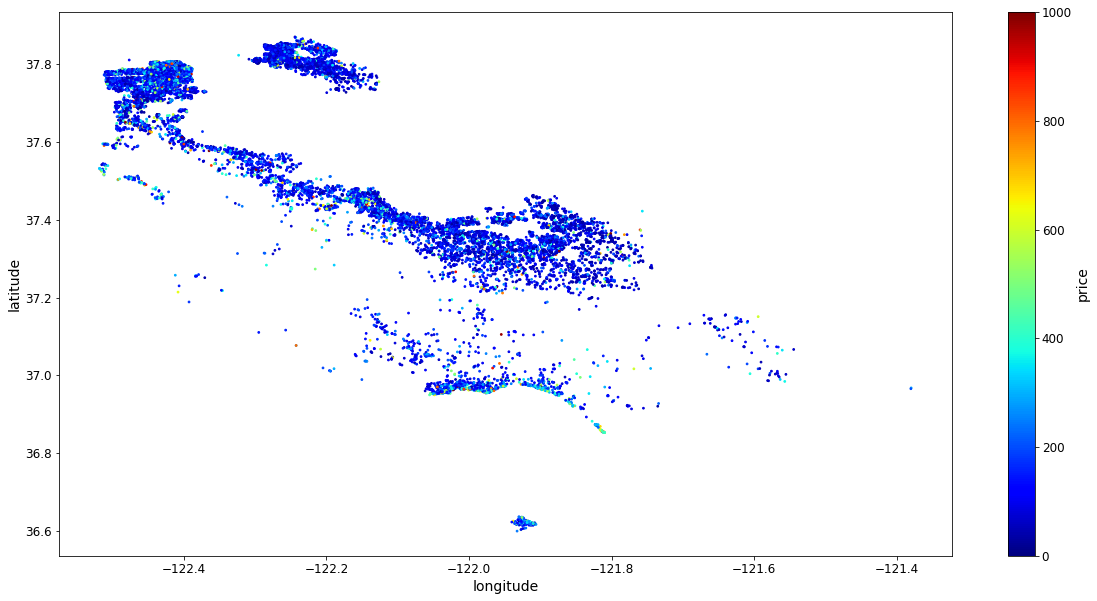

In [18]:
# zoom into southwest region (California)
airbnb.loc[(airbnb.latitude<=40) & (airbnb.longitude <=-120) & (airbnb.longitude >=-156)].plot(kind='scatter',x='longitude',y='latitude',figsize=(20,10),c='price',s=3,
            cmap=plt.get_cmap("jet"), colorbar=True,sharex=False)


In [19]:
# Download US image
images_path = os.path.join('/Users/ziyezhang/Desktop/MMA/INSY695 Enterpr Analytics/HW1', "Image")
filename = 'USMAP.png'

import matplotlib.image as mpimg
US_img=mpimg.imread(os.path.join(images_path, filename))

No handles with labels found to put in legend.


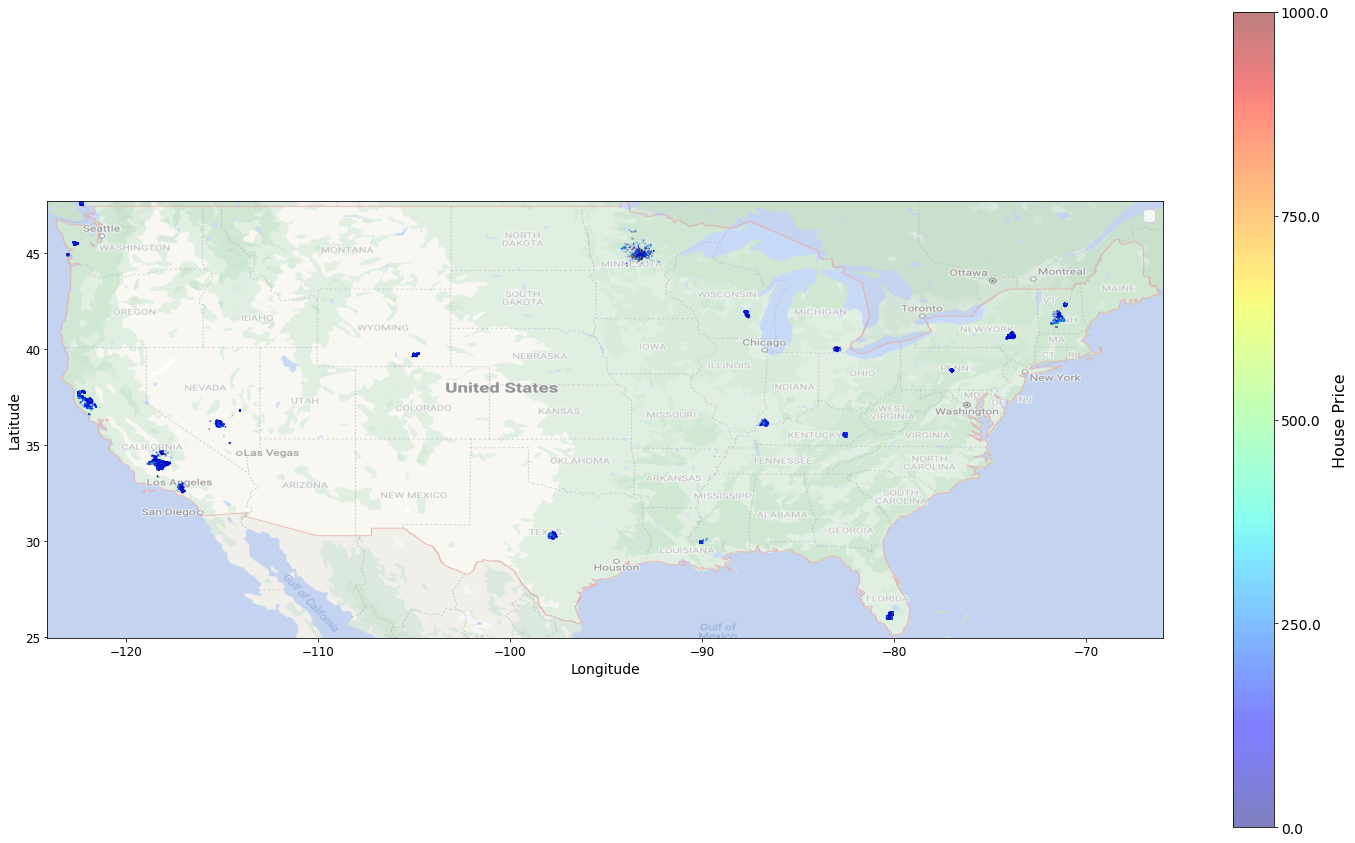

In [20]:
ax = airbnb.plot(kind='scatter',x='longitude',y='latitude',figsize=(25,15),c='price',s=0.1,
            cmap=plt.get_cmap("jet"), colorbar=False,sharex=False, alpha=0.4)
plt.imshow(US_img, extent=[-124.11083, -65.99595, 24.95744, 47.73462], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = airbnb["price"]
tick_values = np.linspace(prices.min(), prices.max(), 5)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels([v for v in tick_values], fontsize=14)
cbar.set_label('House Price', fontsize=16)
plt.legend(fontsize=16)
plt.show()

## 3.3 Correlations

In [21]:
corr_matrix=airbnb.corr()
corr_matrix["price"].sort_values(ascending=False)


price                             1.000000
availability_365                  0.080638
calculated_host_listings_count    0.027181
minimum_nights                   -0.030157
longitude                        -0.037482
latitude                         -0.059380
reviews_per_month                -0.100547
number_of_reviews                -0.104118
Name: price, dtype: float64

In [22]:
corr_matrix["number_of_reviews"].sort_values(ascending=False)

number_of_reviews                 1.000000
reviews_per_month                 0.729937
availability_365                  0.064976
latitude                          0.023963
minimum_nights                   -0.086161
longitude                        -0.094002
calculated_host_listings_count   -0.097848
price                            -0.104118
Name: number_of_reviews, dtype: float64

Save Figure:  scatter_matrix_plot


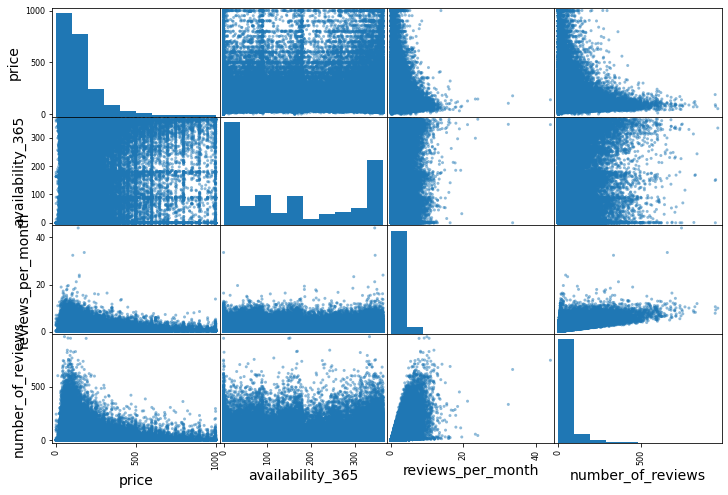

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["price", "availability_365", "reviews_per_month",
              "number_of_reviews"]
scatter_matrix(airbnb[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Save Figure:  review_vs_house_price_scatterplot


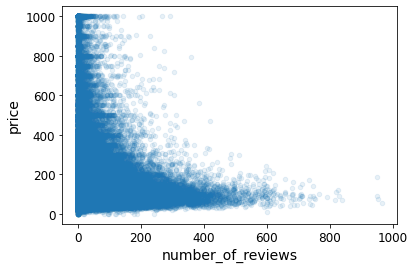

In [24]:
airbnb.plot(kind="scatter", x="number_of_reviews", y="price",
             alpha=0.1)
save_fig("review_vs_house_price_scatterplot")

# 4 Data Preparation

In [212]:
X_train = train_set.drop('price',axis=1)
y_train = train_set['price'].copy()

In [26]:
X_train['last_review'] = pd.to_datetime(X_train['last_review'])
X_train['Days_since_last_review']=(X_train['last_review'].max()-X_train['last_review']).dt.days
X_train = X_train.drop('last_review',axis=1)

In [27]:
X_train

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city,Days_since_last_review
113789,NaN,Audubon,29.93736,-90.11165,Entire home/apt,1,104,3.76,31,0,New Orleans,6.0
88582,Other Cities,Long Beach,33.76130,-118.13903,Entire home/apt,2,87,3.46,1,338,Los Angeles,153.0
70958,NaN,Ward E (councilmember James Solomon),40.71846,-74.04129,Entire home/apt,21,2,0.04,13,365,Jersey City,568.0
219796,NaN,"Union Station, Stanton Park, Kingman Park",38.90297,-76.99477,Private room,2,173,3.31,1,62,Washington D.C.,220.0
107346,NaN,District 19,36.16484,-86.77537,Private room,1,0,NaN,10,315,Nashville,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
146465,Manhattan,Upper East Side,40.76935,-73.95340,Entire home/apt,5,8,0.37,1,365,New York City,36.0
149119,Manhattan,East Harlem,40.78974,-73.94933,Entire home/apt,1,92,5.36,5,38,New York City,247.0
20884,NaN,Fort Lauderdale,26.10805,-80.10732,Entire home/apt,3,1,0.06,6,353,Broward County,654.0
19038,NaN,Lauderdale By The Sea,26.20551,-80.09841,Entire home/apt,6,1,0.09,16,89,Broward County,521.0


In [28]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
permonth_review_imputer = SimpleImputer(strategy = 'constant',fill_value= 0)
days_review_imputer = SimpleImputer(strategy='constant',fill_value = 999)
ohe = OneHotEncoder(handle_unknown='ignore')
neighbor_imputer = make_pipeline(SimpleImputer(strategy='constant',fill_value='Missing'),
                                 OneHotEncoder(handle_unknown='ignore', sparse=False))

### Custom Transformer

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_transformer
#df['Min_Stay_Dur'] = pd.cut(df['minimum_nights'],
#                           bins=[0,1,2,3,29,30,np.inf],
#                           labels = ['1_night', '2_nights', '3_nights', '4_29_nights',
#                                     '30_nights','Greaterthan_30_nights']) 
# group into 1 night, 2 nights, 3, 4-29, 30 nights, and 31 or more nights

#df['Review_cat'] = pd.cut(df['number_of_reviews'], 
#                          bins = [-1,0,10,100,200,np.inf],
#                         labels = [1,2,3,4,5]) 
# group into 0 review, less than 10 reviews, less than 
# 100 reviews, less than 200 reviews, greater than 200 reviews

class Convert_Num_to_Cat(BaseEstimator,TransformerMixin):
    def __init__(self):
        print('Convert Minimum_nights to Min_Stay_Dur (Categorical)')
    def fit(self,X,y=None):
        return self
    def transform(self,X, y=None):
        X_copy = X.copy()
        X_copy['Min_Stay_Dur'] = pd.cut(X_copy['minimum_nights'],
                           bins=[0,1,2,3,29,30,np.inf],
                           labels = ['1_night', '2_nights', '3_nights', '4_29_nights',
                                     '30_nights','Greaterthan_30_nights'])
        X_copy = X_copy.drop('minimum_nights',axis=1)
        return X_copy

In [30]:
Night_ct = make_column_transformer((OneHotEncoder(),['Min_Stay_Dur']),remainder='passthrough')
Night_imputer=make_pipeline(Convert_Num_to_Cat(),Night_ct)

Convert Minimum_nights to Min_Stay_Dur (Categorical)


In [31]:
Night_imputer

Pipeline(steps=[('convert_num_to_cat', Convert_Num_to_Cat()),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Min_Stay_Dur'])]))])

In [32]:
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
# ct = make_column_transformer(
#     (permonth_review_imputer,['reviews_per_month']),
#     (days_review_imputer,['Days_since_last_review']),
#     (neighbor_imputer,['neighbourhood_group']),
#     (ohe,['room_type','city']),
#     (Night_imputer,['minimum_nights']),
#     ('passthrough',['latitude','longitude','number_of_reviews',
#                     'calculated_host_listings_count','availability_365']),
#     remainder='drop')

ct = ColumnTransformer([
    ('a',permonth_review_imputer,['reviews_per_month']),
    ('b',days_review_imputer,['Days_since_last_review']),
    ('c',neighbor_imputer,['neighbourhood_group']),
    ('d',ohe,['room_type','city']),
    ('e',Night_imputer,['minimum_nights']),
    ('f','passthrough',['latitude','longitude','number_of_reviews',
                    'calculated_host_listings_count','availability_365'])],
    remainder='drop')

In [33]:
ct.fit(X_train)
airbnb_X=ct.transform(X_train)


Convert Minimum_nights to Min_Stay_Dur (Categorical)


In [34]:
ct.named_transformers_['c']['onehotencoder'].categories_[0]

array(['Ballard', 'Beacon Hill', 'Bristol', 'Bronx', 'Brooklyn',
       'Capitol Hill', 'Cascade', 'Central Area', 'City of Los Angeles',
       'Delridge', 'Downtown', 'Interbay', 'Kent', 'Lake City',
       'Magnolia', 'Manhattan', 'Missing', 'Newport', 'Northgate',
       'Other Cities', 'Other neighborhoods', 'Providence', 'Queen Anne',
       'Queens', 'Rainier Valley', 'Seward Park', 'Staten Island',
       'Unincorporated Areas', 'University District', 'Washington',
       'West Seattle'], dtype=object)

In [35]:
ct.named_transformers_['d'].categories_[1]

array(['Asheville', 'Austin', 'Boston', 'Broward County', 'Cambridge',
       'Chicago', 'Clark County', 'Columbus', 'Denver', 'Jersey City',
       'Los Angeles', 'Nashville', 'New Orleans', 'New York City',
       'Oakland', 'Pacific Grove', 'Portland', 'Rhode Island', 'Salem',
       'San Clara Country', 'San Diego', 'San Francisco',
       'San Mateo County', 'Santa Cruz County', 'Seattle',
       'Twin Cities MSA', 'Washington D.C.'], dtype=object)

In [36]:
ct.named_transformers_['e']['columntransformer'].named_transformers_['onehotencoder'].categories_[0]

array(['1_night', '2_nights', '30_nights', '3_nights', '4_29_nights',
       'Greaterthan_30_nights'], dtype=object)

In [37]:
nbh=ct.named_transformers_['c']['onehotencoder'].categories_[0]
rmtype=ct.named_transformers_['d'].categories_[0]
cty = ct.named_transformers_['d'].categories_[1]
night = ct.named_transformers_['e']['columntransformer'].named_transformers_['onehotencoder'].categories_[0]
feature_names = ['reviews_per_month','Days_since_last_review']+list(nbh)+ list(rmtype)+list(cty)+list(night)+['latitude','longitude',
                                    'number_of_reviews','calculated_host_listings_count','availability_365']
len(feature_names)

75

In [38]:
airbnb_X.shape

(159794, 75)

# 5 Modelling 

In [39]:
airbnb_X

array([[3.76e+00, 6.00e+00, 0.00e+00, ..., 1.04e+02, 3.10e+01, 0.00e+00],
       [3.46e+00, 1.53e+02, 0.00e+00, ..., 8.70e+01, 1.00e+00, 3.38e+02],
       [4.00e-02, 5.68e+02, 0.00e+00, ..., 2.00e+00, 1.30e+01, 3.65e+02],
       ...,
       [6.00e-02, 6.54e+02, 0.00e+00, ..., 1.00e+00, 6.00e+00, 3.53e+02],
       [9.00e-02, 5.21e+02, 0.00e+00, ..., 1.00e+00, 1.60e+01, 8.90e+01],
       [0.00e+00, 9.99e+02, 0.00e+00, ..., 0.00e+00, 4.00e+00, 1.80e+02]])

In [40]:
y_train.shape

(159794,)

## Import Estimators that will be used and Import MSE as the metric

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

## Cross Validate the model

In [42]:
from sklearn.model_selection import cross_val_score
# linear reg
scores_lr = cross_val_score(LinearRegression(),airbnb_X,y_train,scoring='neg_mean_squared_error',cv=5)
lr_rmse_scores = np.sqrt(-scores_lr)
print(lr_rmse_scores.mean())

# Tree
scores_tree = cross_val_score(DecisionTreeRegressor(),airbnb_X,y_train,scoring='neg_mean_squared_error',cv=5)
tree_rmse_scores = np.sqrt(-scores_tree)
print(tree_rmse_scores.mean())

# GBM
scores_gbm = cross_val_score(GradientBoostingRegressor(),airbnb_X,y_train,scoring='neg_mean_squared_error',cv=5)
gbm_rmse_scores = np.sqrt(-scores_gbm)
print(gbm_rmse_scores.mean())

# RF
scores_rf = cross_val_score(RandomForestRegressor(),airbnb_X,y_train,scoring='neg_mean_squared_error',cv=5)
rf_rmse_scores = np.sqrt(-scores_rf)
print(rf_rmse_scores.mean())

# Lasso
scores_lasso = cross_val_score(Lasso(),airbnb_X,y_train,scoring='neg_mean_squared_error',cv=5)
lasso_rmse_scores = np.sqrt(-scores_lasso)
print(lasso_rmse_scores.mean())

133.78926372440657
166.91707301587766
129.5662180721555
119.0042186000398
136.83820723045568


### The above process takes a long time to run because our dataset is so large.
### The code below for tuning is constructed but takes a long time to run.
### We skip the fine tuning and go to evaluate the final model.

# 6 Model Evaluation & Selection

### From the cross validation scores, we can see random forest provide a much smaller RMSE. Given that we have 73 features in the data, random forest seems to filter out the insignificant predictors and make predictions using the important ones

In [43]:
# feature importance
model = RandomForestRegressor(random_state=5,n_estimators=100,max_features=10,max_depth=3)
model.fit(airbnb_X,y_train)


RandomForestRegressor(max_depth=3, max_features=10, random_state=5)

In [44]:
np.argsort(model.feature_importances_)
sorted(zip(model.feature_importances_, feature_names), reverse=True)

[(0.3134381277987743, 'Entire home/apt'),
 (0.17738494164516017, 'Private room'),
 (0.06762062325396402, '3_nights'),
 (0.0653482185335505, 'reviews_per_month'),
 (0.05552563089926923, 'number_of_reviews'),
 (0.04936666843942691, 'longitude'),
 (0.032637409239903395, 'latitude'),
 (0.032445541548787774, 'New York City'),
 (0.028784314105035184, 'Shared room'),
 (0.027950649747988464, 'Twin Cities MSA'),
 (0.022746357870561344, '1_night'),
 (0.01852750055918065, 'Brooklyn'),
 (0.0183642310025312, 'Rhode Island'),
 (0.016103149902611663, 'Newport'),
 (0.011678137024596691, '30_nights'),
 (0.009191699103908078, 'Days_since_last_review'),
 (0.008867118681714874, 'calculated_host_listings_count'),
 (0.008157714619383484, 'Missing'),
 (0.006605789220301922, 'Queens'),
 (0.005691167239782559, 'availability_365'),
 (0.0036958773081894147, 'Providence'),
 (0.003621348362225518, 'Manhattan'),
 (0.00309760444176724, '2_nights'),
 (0.002925384862010605, 'Washington'),
 (0.0019558702704660846, 'Hot

# 7 Fine-Tune the Best Estimator (RF) using Randomized Search

In [45]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# param_distribs = {
#         'n_estimators': randint(low=100, high=200),
#         'max_features': randint(low=1, high=50),
#     }
# rf_reg = RandomForestRegressor(random_state=5)
# rnd_search = RandomizedSearchCV(rf_reg,param_distributions=param_distribs,n_iter=10,cv=2,
#                                 scoring='neg_mean_squared_error',random_state=5)

#rnd_search.fit(airbnb_X,y_train)

#cvres = rnd_search.cv_results_
#for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#    print(np.sqrt(-mean_score), params)

# Evaluate the Estimator on the Test Set

In [46]:
test_set

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
12212,NaN,78717,30.47723,-97.78519,Entire home/apt,80,30,0,NaN,NaN,593,301,Austin
94046,Other Cities,Long Beach,33.77641,-118.16856,Entire home/apt,97,2,61,03/09/20,4.03,1,296,Los Angeles
39959,NaN,Unincorporated Areas,36.11616,-115.16473,Private room,214,2,1,15/03/20,0.18,14,360,Clark County
95375,Other Cities,Santa Monica,34.02206,-118.49285,Entire home/apt,179,31,4,29/07/20,0.38,74,364,Los Angeles
148789,Queens,Ditmars Steinway,40.77253,-73.91476,Private room,125,7,9,31/10/19,0.55,1,365,New York City
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155608,Manhattan,Upper West Side,40.78568,-73.97529,Entire home/apt,200,30,0,NaN,NaN,1,89,New York City
86890,Other Cities,Long Beach,33.75805,-118.14380,Private room,75,1,33,08/03/20,1.15,5,0,Los Angeles
195298,NaN,Marina,37.79766,-122.42534,Private room,125,1,137,16/08/20,1.94,16,111,San Francisco
10415,NaN,78746,30.34496,-97.80054,Entire home/apt,30,3,2,31/07/20,0.80,14,0,Austin


In [47]:
X_test = test_set.drop('price',axis=1)
y_test = test_set['price'].copy()

X_test['last_review'] = pd.to_datetime(X_test['last_review'])
X_test['Days_since_last_review']=(X_test['last_review'].max()-X_test['last_review']).dt.days
X_test = X_test.drop('last_review',axis=1)

In [48]:
X_test = ct.transform(X_test)
X_test

array([[0.00e+00, 9.99e+02, 0.00e+00, ..., 0.00e+00, 5.93e+02, 3.01e+02],
       [4.03e+00, 2.75e+02, 0.00e+00, ..., 6.10e+01, 1.00e+00, 2.96e+02],
       [1.80e-01, 2.69e+02, 0.00e+00, ..., 1.00e+00, 1.40e+01, 3.60e+02],
       ...,
       [1.94e+00, 1.15e+02, 0.00e+00, ..., 1.37e+02, 1.60e+01, 1.11e+02],
       [8.00e-01, 1.31e+02, 0.00e+00, ..., 2.00e+00, 1.40e+01, 0.00e+00],
       [6.00e-01, 2.46e+02, 0.00e+00, ..., 1.80e+01, 1.00e+00, 2.72e+02]])

In [49]:
pred = model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, pred))
print(final_rmse)

139.63111507269858


# Causal ML

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from causalml.inference.meta import BaseSRegressor, BaseTRegressor, BaseXRegressor, BaseRRegressor
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.dataset.regression import synthetic_data
from sklearn.linear_model import LinearRegression

import shap
import matplotlib.pyplot as plt

import time
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

import os
import warnings
warnings.filterwarnings('ignore')

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'  # for lightgbm to work

%reload_ext autoreload
%autoreload 2
%matplotlib inline

sklearn.tree._tree.TreeBuilder size changed, may indicate binary incompatibility. Expected 72 from C header, got 80 from PyObject


In [70]:
feature_names

['reviews_per_month',
 'Days_since_last_review',
 'Ballard',
 'Beacon Hill',
 'Bristol',
 'Bronx',
 'Brooklyn',
 'Capitol Hill',
 'Cascade',
 'Central Area',
 'City of Los Angeles',
 'Delridge',
 'Downtown',
 'Interbay',
 'Kent',
 'Lake City',
 'Magnolia',
 'Manhattan',
 'Missing',
 'Newport',
 'Northgate',
 'Other Cities',
 'Other neighborhoods',
 'Providence',
 'Queen Anne',
 'Queens',
 'Rainier Valley',
 'Seward Park',
 'Staten Island',
 'Unincorporated Areas',
 'University District',
 'Washington',
 'West Seattle',
 'Entire home/apt',
 'Hotel room',
 'Private room',
 'Shared room',
 'Asheville',
 'Austin',
 'Boston',
 'Broward County',
 'Cambridge',
 'Chicago',
 'Clark County',
 'Columbus',
 'Denver',
 'Jersey City',
 'Los Angeles',
 'Nashville',
 'New Orleans',
 'New York City',
 'Oakland',
 'Pacific Grove',
 'Portland',
 'Rhode Island',
 'Salem',
 'San Clara Country',
 'San Diego',
 'San Francisco',
 'San Mateo County',
 'Santa Cruz County',
 'Seattle',
 'Twin Cities MSA',
 'Wash

In [213]:
airbnb_X.shape

(159794, 75)

In [214]:
y_train.shape

(159794,)

## The treatment feature is whether the room is a private room

In [215]:
W = airbnb_X[:,feature_names.index('Private room')]

In [216]:
np.count_nonzero(airbnb_X[:,feature_names.index('Private room')])

50726

In [217]:
w_multi = np.array(['treatment_A' if x==1 else 'control' for x in W])

In [218]:
w_multi.shape

(159794,)

In [219]:
X = np.delete(airbnb_X, feature_names.index('Private room'), 1)

In [220]:
y = y_train

In [226]:
feature_names.remove('Private room')

In [230]:
len(feature_names)

74

## LRSRegressor

In [231]:
base_algo = LinearRegression()
# base_algo = XGBRegressor()
# base_algo = LinearRegression()

slearner = BaseSRegressor(base_algo, control_name='control')
slearner.estimate_ate(X, w_multi, y)

array([-45.67323345])

In [232]:
slearner_tau = slearner.fit_predict(X, w_multi, y)

### Feature Importance (method = `auto`)

In [233]:
Imp_list = slearner.get_importance(X=X, 
                        tau=slearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

In [234]:
Imp_list['treatment_A'][0:20]

reviews_per_month                 0.695081
Days_since_last_review            0.205676
Downtown                          0.049428
latitude                          0.049428
number_of_reviews                 0.000386
Portland                          0.000000
Pacific Grove                     0.000000
Oakland                           0.000000
New York City                     0.000000
New Orleans                       0.000000
Nashville                         0.000000
Los Angeles                       0.000000
calculated_host_listings_count    0.000000
Rhode Island                      0.000000
Denver                            0.000000
Columbus                          0.000000
Clark County                      0.000000
Chicago                           0.000000
Cambridge                         0.000000
Broward County                    0.000000
dtype: float64

In [235]:
Imp_list['treatment_A'].index[0:20]

Index(['reviews_per_month', 'Days_since_last_review', 'Downtown', 'latitude',
       'number_of_reviews', 'Portland', 'Pacific Grove', 'Oakland',
       'New York City', 'New Orleans', 'Nashville', 'Los Angeles',
       'calculated_host_listings_count', 'Rhode Island', 'Denver', 'Columbus',
       'Clark County', 'Chicago', 'Cambridge', 'Broward County'],
      dtype='object')

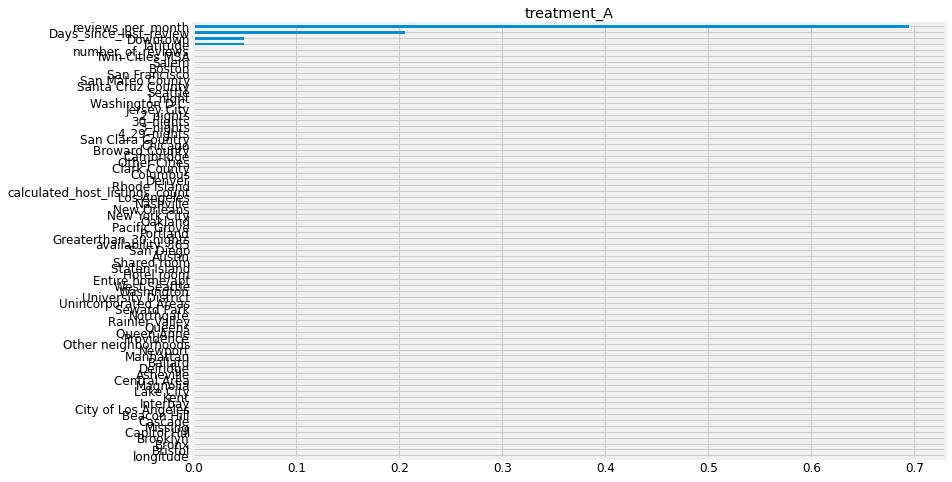

In [236]:
Imp_plot= slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

<AxesSubplot:>

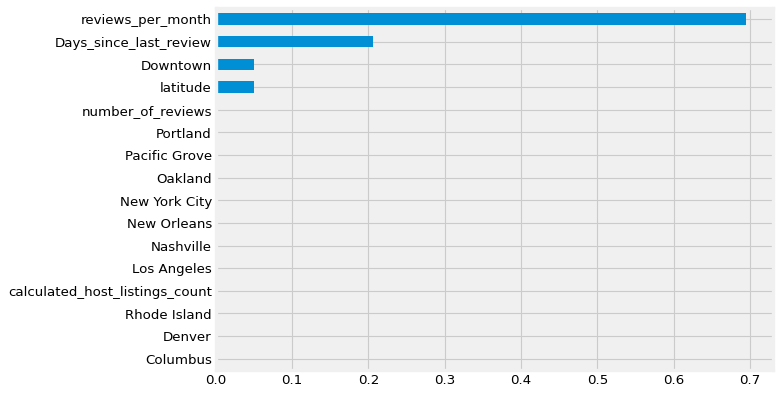

In [237]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

Imp_list['treatment_A'][15::-1].plot.barh()

## LGBMSRegressor

In [238]:
base_algo = LGBMRegressor()
# base_algo = XGBRegressor()
# base_algo = LinearRegression()

slearner = BaseSRegressor(base_algo, control_name='control')
slearner.estimate_ate(X, w_multi, y)

array([1.36570347])

In [239]:
slearner_tau = slearner.fit_predict(X, w_multi, y)

### Feature Importance (method = `auto`)

In [240]:
Imp_list = slearner.get_importance(X=X, 
                        tau=slearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

In [241]:
Imp_list['treatment_A'][0:20]

longitude                         0.304019
Broward County                    0.209217
latitude                          0.136510
Entire home/apt                   0.099334
calculated_host_listings_count    0.074055
availability_365                  0.056438
Days_since_last_review            0.031220
reviews_per_month                 0.027302
3_nights                          0.007839
4_29_nights                       0.006975
30_nights                         0.005330
Greaterthan_30_nights             0.005327
2_nights                          0.004938
number_of_reviews                 0.004741
Twin Cities MSA                   0.003284
San Mateo County                  0.003219
Clark County                      0.003000
Hotel room                        0.002991
San Francisco                     0.002714
City of Los Angeles               0.002313
dtype: float64

In [242]:
Imp_list['treatment_A'].index[0:20]

Index(['longitude', 'Broward County', 'latitude', 'Entire home/apt',
       'calculated_host_listings_count', 'availability_365',
       'Days_since_last_review', 'reviews_per_month', '3_nights',
       '4_29_nights', '30_nights', 'Greaterthan_30_nights', '2_nights',
       'number_of_reviews', 'Twin Cities MSA', 'San Mateo County',
       'Clark County', 'Hotel room', 'San Francisco', 'City of Los Angeles'],
      dtype='object')

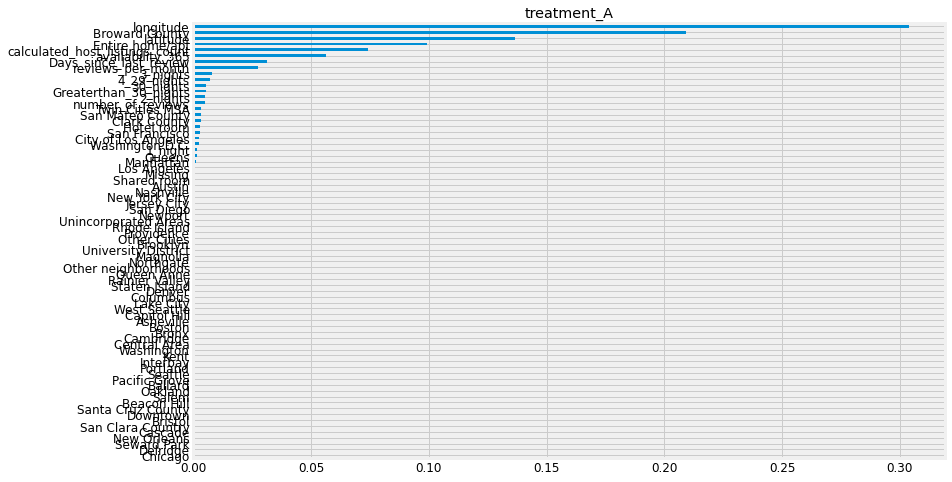

In [243]:
Imp_plot= slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

<AxesSubplot:>

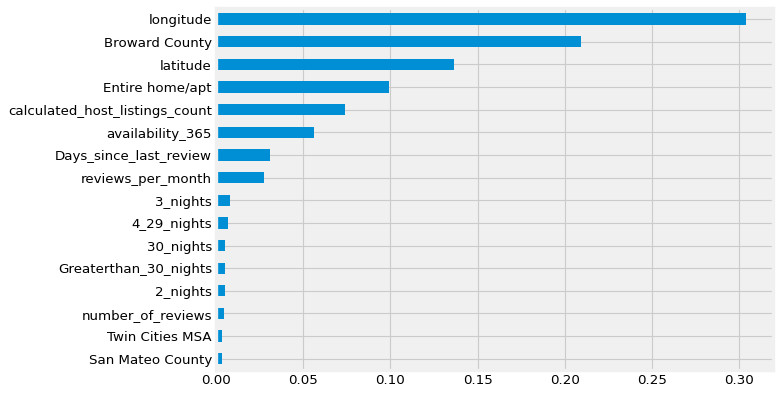

In [244]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

Imp_list['treatment_A'][15::-1].plot.barh()

In [245]:
model_tau = LGBMRegressor(importance_type='gain')  # specify model for model_tau

### Feature Importance (`sklearn.inspection.permutation_importance`)


In [246]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, slearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean


print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 25.96403479576111 seconds


In [247]:
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

longitude                         0.904601
Broward County                    0.900208
latitude                          0.307296
Entire home/apt                   0.222318
calculated_host_listings_count    0.153245
                                    ...   
Boston                            0.000000
Bronx                             0.000000
Cambridge                         0.000000
Central Area                      0.000000
Chicago                           0.000000
Length: 74, dtype: float64

Text(0.5, 1.0, 'Test Set Permutation Importances')

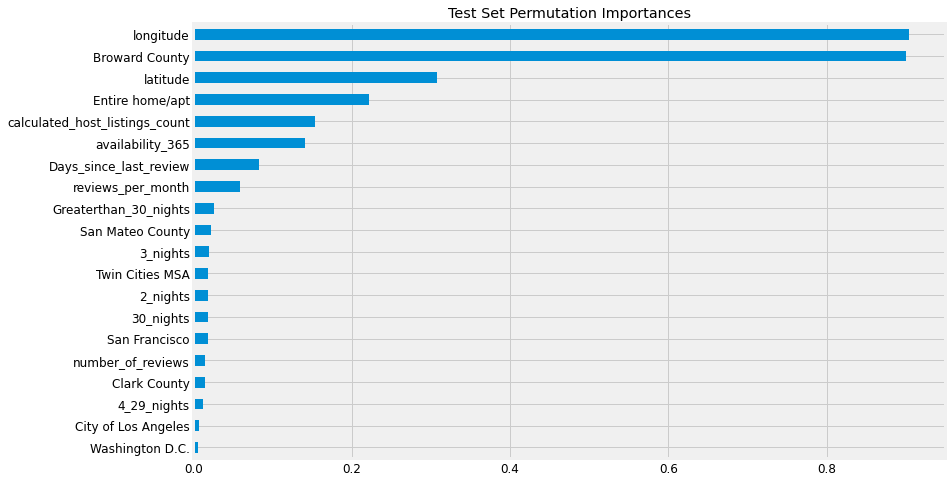

In [248]:
pd.Series(perm_imp_test, feature_names).sort_values().tail(20).plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

### Shapley Values

In [249]:
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau)
shap_slearner

{'treatment_A': array([[-3.52263912e-02, -7.58124821e-02,  0.00000000e+00, ...,
          3.85472847e-02,  2.56439859e-01, -9.19909637e-03],
        [ 2.19614668e-03,  9.82494514e-02,  0.00000000e+00, ...,
         -2.12449252e-03, -1.08471396e-01, -2.38848480e-02],
        [-1.10608804e-01, -5.54074440e-02,  0.00000000e+00, ...,
          1.98877578e-03,  4.95200588e-01,  2.44736211e-01],
        ...,
        [-1.10764034e-01,  5.50129183e-01,  0.00000000e+00, ...,
         -8.01233147e-03,  2.68439463e-01, -5.03306877e-01],
        [-1.61071580e-01,  5.46283709e-01,  0.00000000e+00, ...,
         -2.57574198e-02,  2.26902983e+00, -9.93425612e-01],
        [ 1.00119998e+00,  1.14555053e-01,  0.00000000e+00, ...,
         -5.16375464e-03,  1.11167506e-01, -1.42137703e-02]])}

In [250]:
np.mean(np.abs(shap_slearner['treatment_A']),axis=0)

array([1.95519666e-01, 1.86558311e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.02576709e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.15317215e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.77104970e-02, 4.44323949e-02, 2.58186220e-03,
       0.00000000e+00, 3.74260369e-03, 0.00000000e+00, 1.77770038e-04,
       0.00000000e+00, 1.37553809e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.62634957e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.35058365e+00, 4.06713923e-02, 1.53488817e-03,
       0.00000000e+00, 1.00084768e-02, 0.00000000e+00, 8.16917438e-01,
       0.00000000e+00, 0.00000000e+00, 6.15133326e-02, 0.00000000e+00,
       0.00000000e+00, 5.69638405e-03, 4.84603311e-03, 1.47824151e-02,
       0.00000000e+00, 4.08242042e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.56529778e-03, 0.00000000e+00, 0.00000000e+00,
      

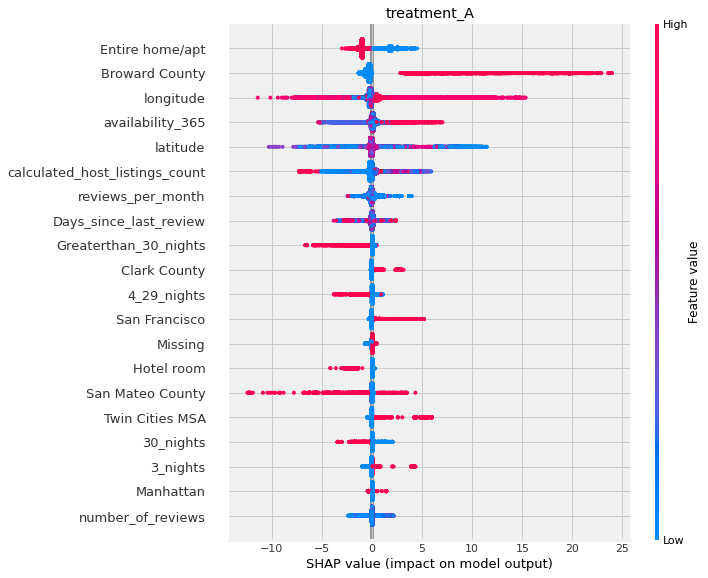

In [251]:
# Plot shap values without specifying shap_dict
slearner.plot_shap_values(X=X, tau=slearner_tau, features=feature_names)

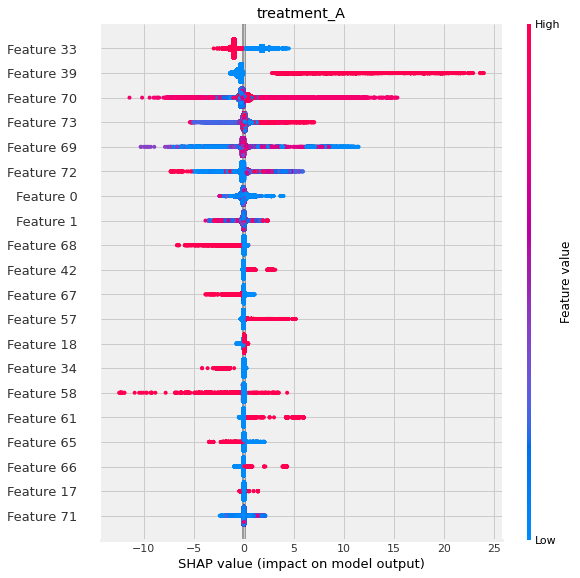

In [252]:
# Plot shap values WITH specifying shap_dict
slearner.plot_shap_values(X=X, shap_dict=shap_slearner)

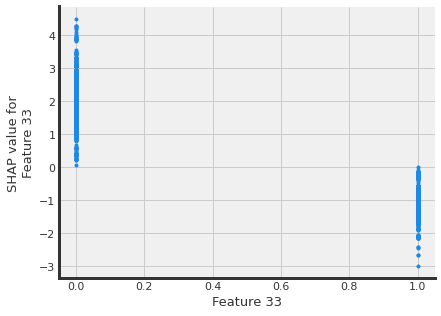

In [253]:
# interaction_idx set to None (no color coding for interaction effects)
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=33,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=None,
                              shap_dict=shap_slearner)

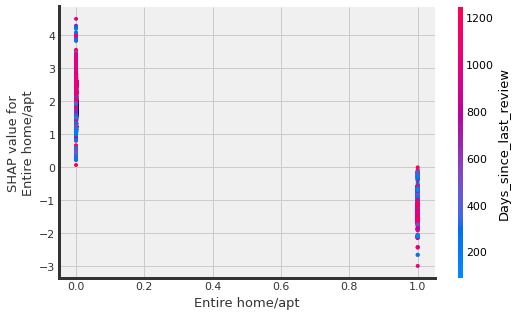

In [254]:
# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
# specify feature names
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=33,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx='auto',
                              shap_dict=shap_slearner,
                              features=feature_names)

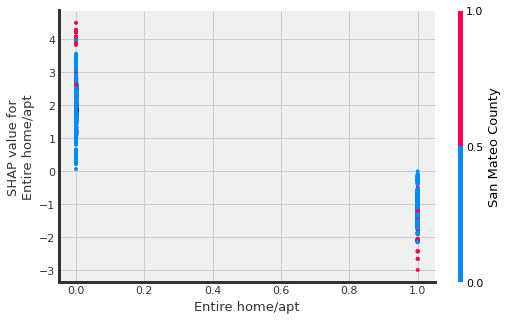

In [256]:
# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
# specify feature names
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=33,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=58,
                              shap_dict=shap_slearner,
                              features=feature_names)


## XGBTRegressor

In [257]:
base_algo = XGBRegressor()
# base_algo = LinearRegression()

tlearner = BaseTRegressor(base_algo, control_name='control')
tlearner.estimate_ate(X, w_multi, y)

(array([-94.96309675]), array([-95.93539605]), array([-93.99079745]))

In [258]:
tlearner_tau = tlearner.fit_predict(X, w_multi, y)

### Feature Importance (method = `auto`)

In [261]:
Imp_list = tlearner.get_importance(X=X, 
                        tau=tlearner_tau, 
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

In [262]:
Imp_list

{'treatment_A': longitude                         0.175248
 calculated_host_listings_count    0.138160
 latitude                          0.121549
 reviews_per_month                 0.102504
 Shared room                       0.088040
                                     ...   
 Seattle                           0.000000
 Seward Park                       0.000000
 Staten Island                     0.000000
 West Seattle                      0.000000
 Magnolia                          0.000000
 Length: 74, dtype: float64}

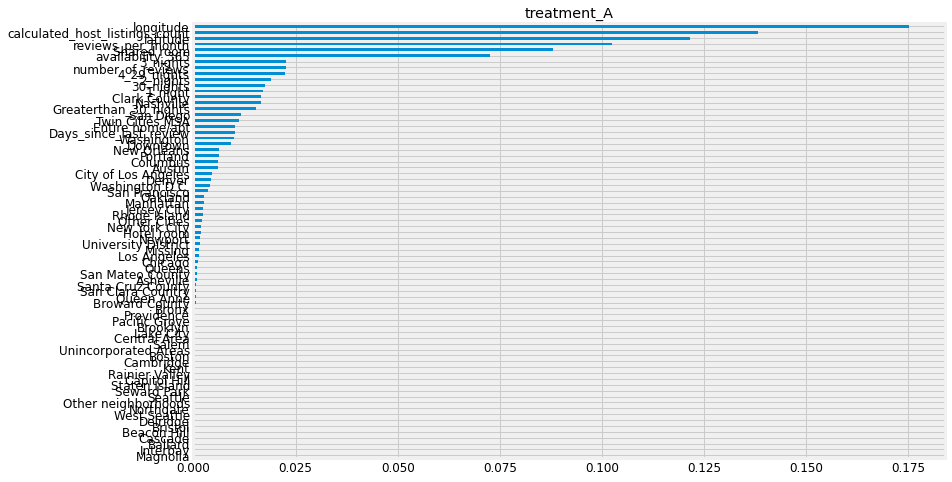

In [263]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

<AxesSubplot:>

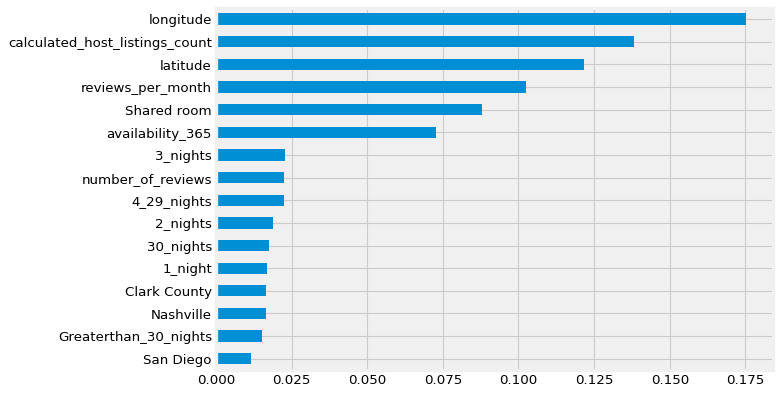

In [264]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

Imp_list['treatment_A'][15::-1].plot.barh()

### Feature Importance (method = `permutation`)

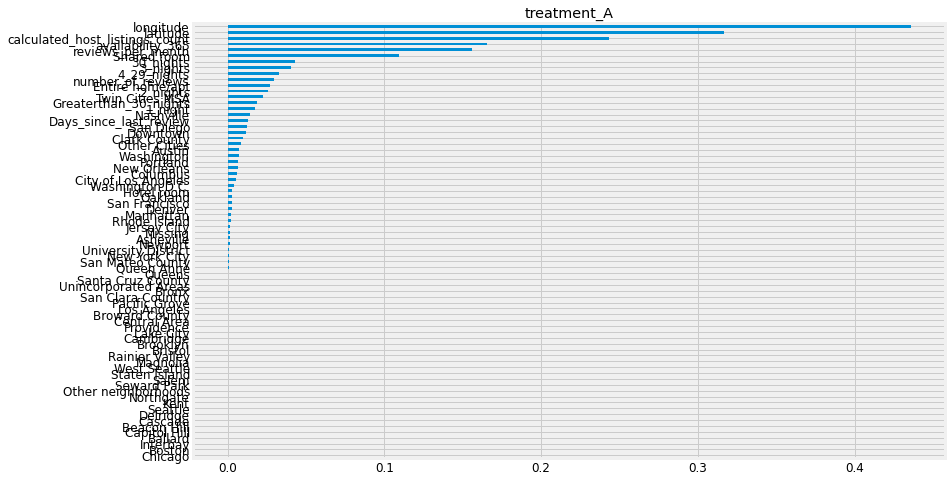

In [265]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         normalize=True, 
                         method='permutation', 
                         features=feature_names)

### Feature Importance (`sklearn.inspection.permutation_importance`)

In [267]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, tlearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean

print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 40.11791729927063 seconds


Text(0.5, 1.0, 'Test Set Permutation Importances')

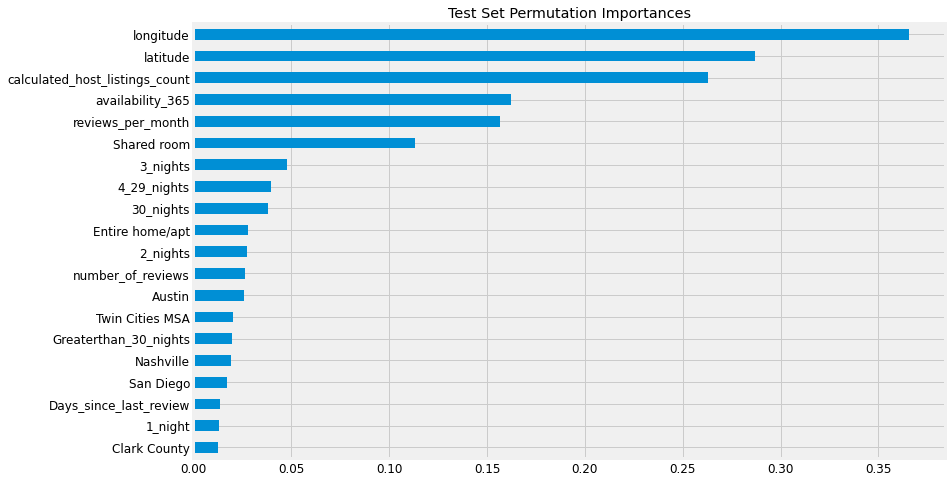

In [268]:
pd.Series(perm_imp_test, feature_names).sort_values().tail(20).plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

### Shapley Values

In [269]:
shap_tlearner = tlearner.get_shap_values(X=X, tau=tlearner_tau)
shap_tlearner

{'treatment_A': array([[ 17.26252061,   2.0420032 ,   0.        , ...,   2.2541063 ,
          -3.94434024,   8.57234996],
        [ 34.91433223,   0.85423334,   0.        , ...,   1.69399562,
          -3.63758195, -15.9453337 ],
        [ -5.86833915,  -3.54713688,   0.        , ...,  -2.80519032,
           1.53938933,  -9.45656893],
        ...,
        [ -5.28144407,  -2.3100014 ,   0.        , ...,   1.82613503,
          -1.10506303, -22.42140631],
        [ -7.72933388,  -2.31216764,   0.        , ...,  -1.43208175,
           7.13851196,  -2.74831323],
        [ -6.80815107,   0.28542768,   0.        , ...,   0.70912096,
          -1.86302197,  -1.1841038 ]])}

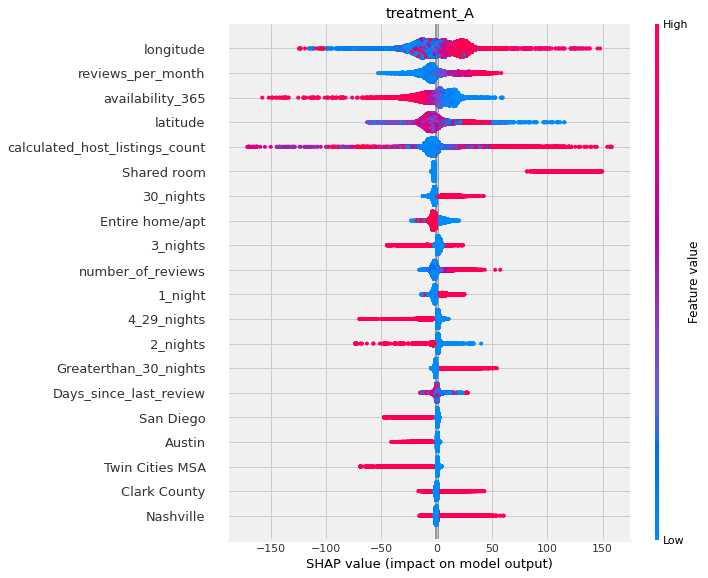

In [270]:
# Plot shap values without specifying shap_dict
tlearner.plot_shap_values(X=X, tau=tlearner_tau, features=feature_names)

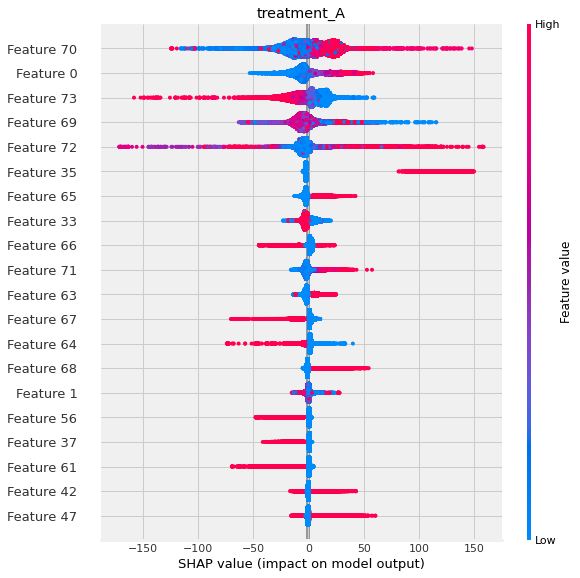

In [271]:
# Plot shap values WITH specifying shap_dict
tlearner.plot_shap_values(X=X, shap_dict=shap_tlearner)

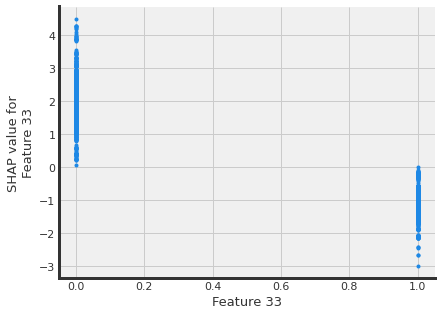

In [285]:
# interaction_idx set to None (no color coding for interaction effects)
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=33,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=None,
                              shap_dict=shap_slearner)

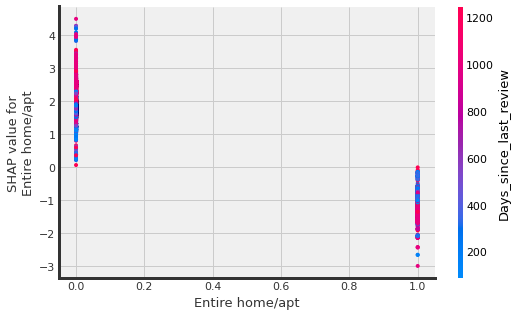

In [284]:
# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
# specify feature names
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=33,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx='auto',
                              shap_dict=shap_slearner,
                              features=feature_names)

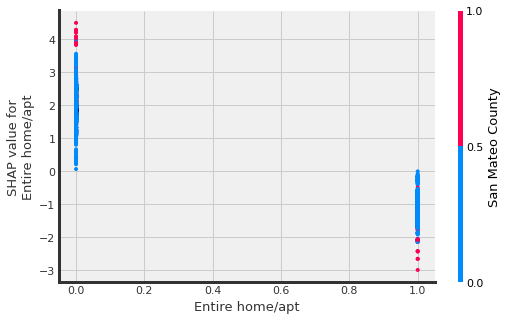

In [288]:
# interaction_idx set to specific index
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=33,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=58,
                              shap_dict=shap_slearner, 
                              features=feature_names)

## Explanation for ATE:

In this analysis, we set the treatment feature to be whether the listing is a private room, and control the other features 

From the XGBTRegressor, we could see the average treatment effect is around -90, which is a negative number.

This shows that being a private room (treatment =1) has a negative causal effect on the price of listings.

Intuitively speaking, one single private room should be less pricy than an entire apt/house. 

Our analysis using CausalML supports this statement.

However, our analysis does not provide the insight of whether a home onwer should rent their house as individual private rooms or entirely, because our analysis only shows a causal effect that single private room causes price to be lower than entire house, but does not take into account the comparison between the price of entire house and the sum of prices gained from its private rooms.

## Explanation for Feature Importance & SHAP Values

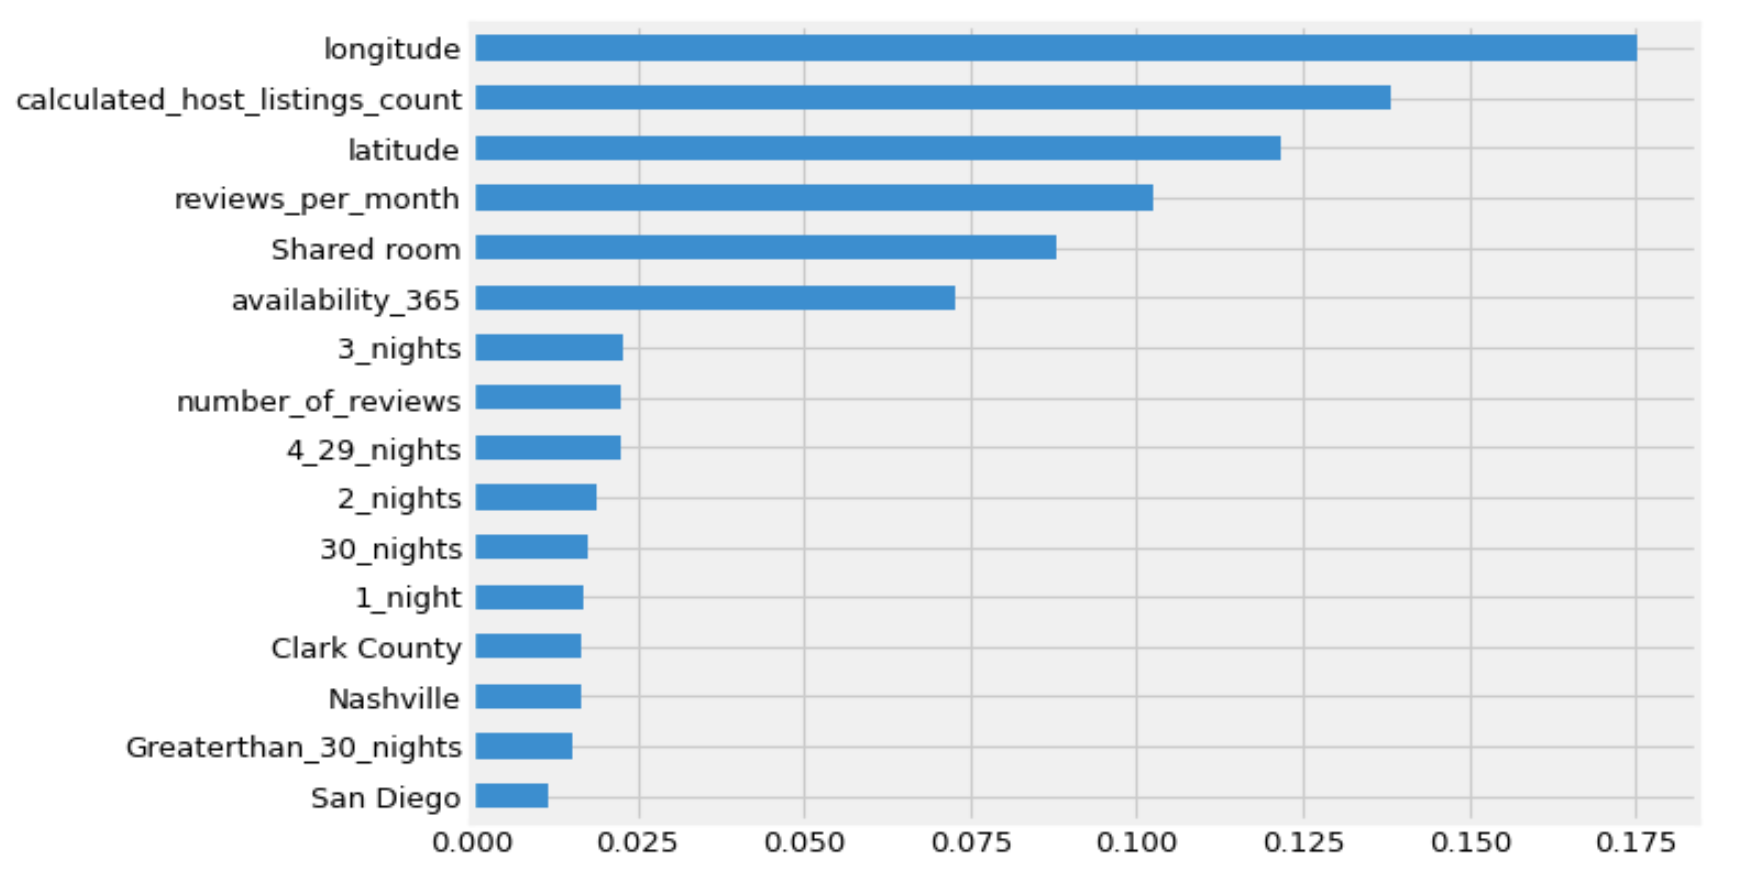

This picture is the auto feature importances gotten from the T learner. Since our feature set is too large to fit into one plot, we select the top 16 most important features to plot here.

From the plot, we can see longitude, listings count, latitude, review per month are the top four features that affect the treatment effect, which is the average of price given W is 1 (meaning it is a private room) minus the average price given W is 0 (meaning it is not a private room)

This feature importance plot, however, only shows the magnitude of impirtances but ignores whether increasing or decreasing the feature value will increase or decrease the treatment effect. This is why we need SHAP Values.

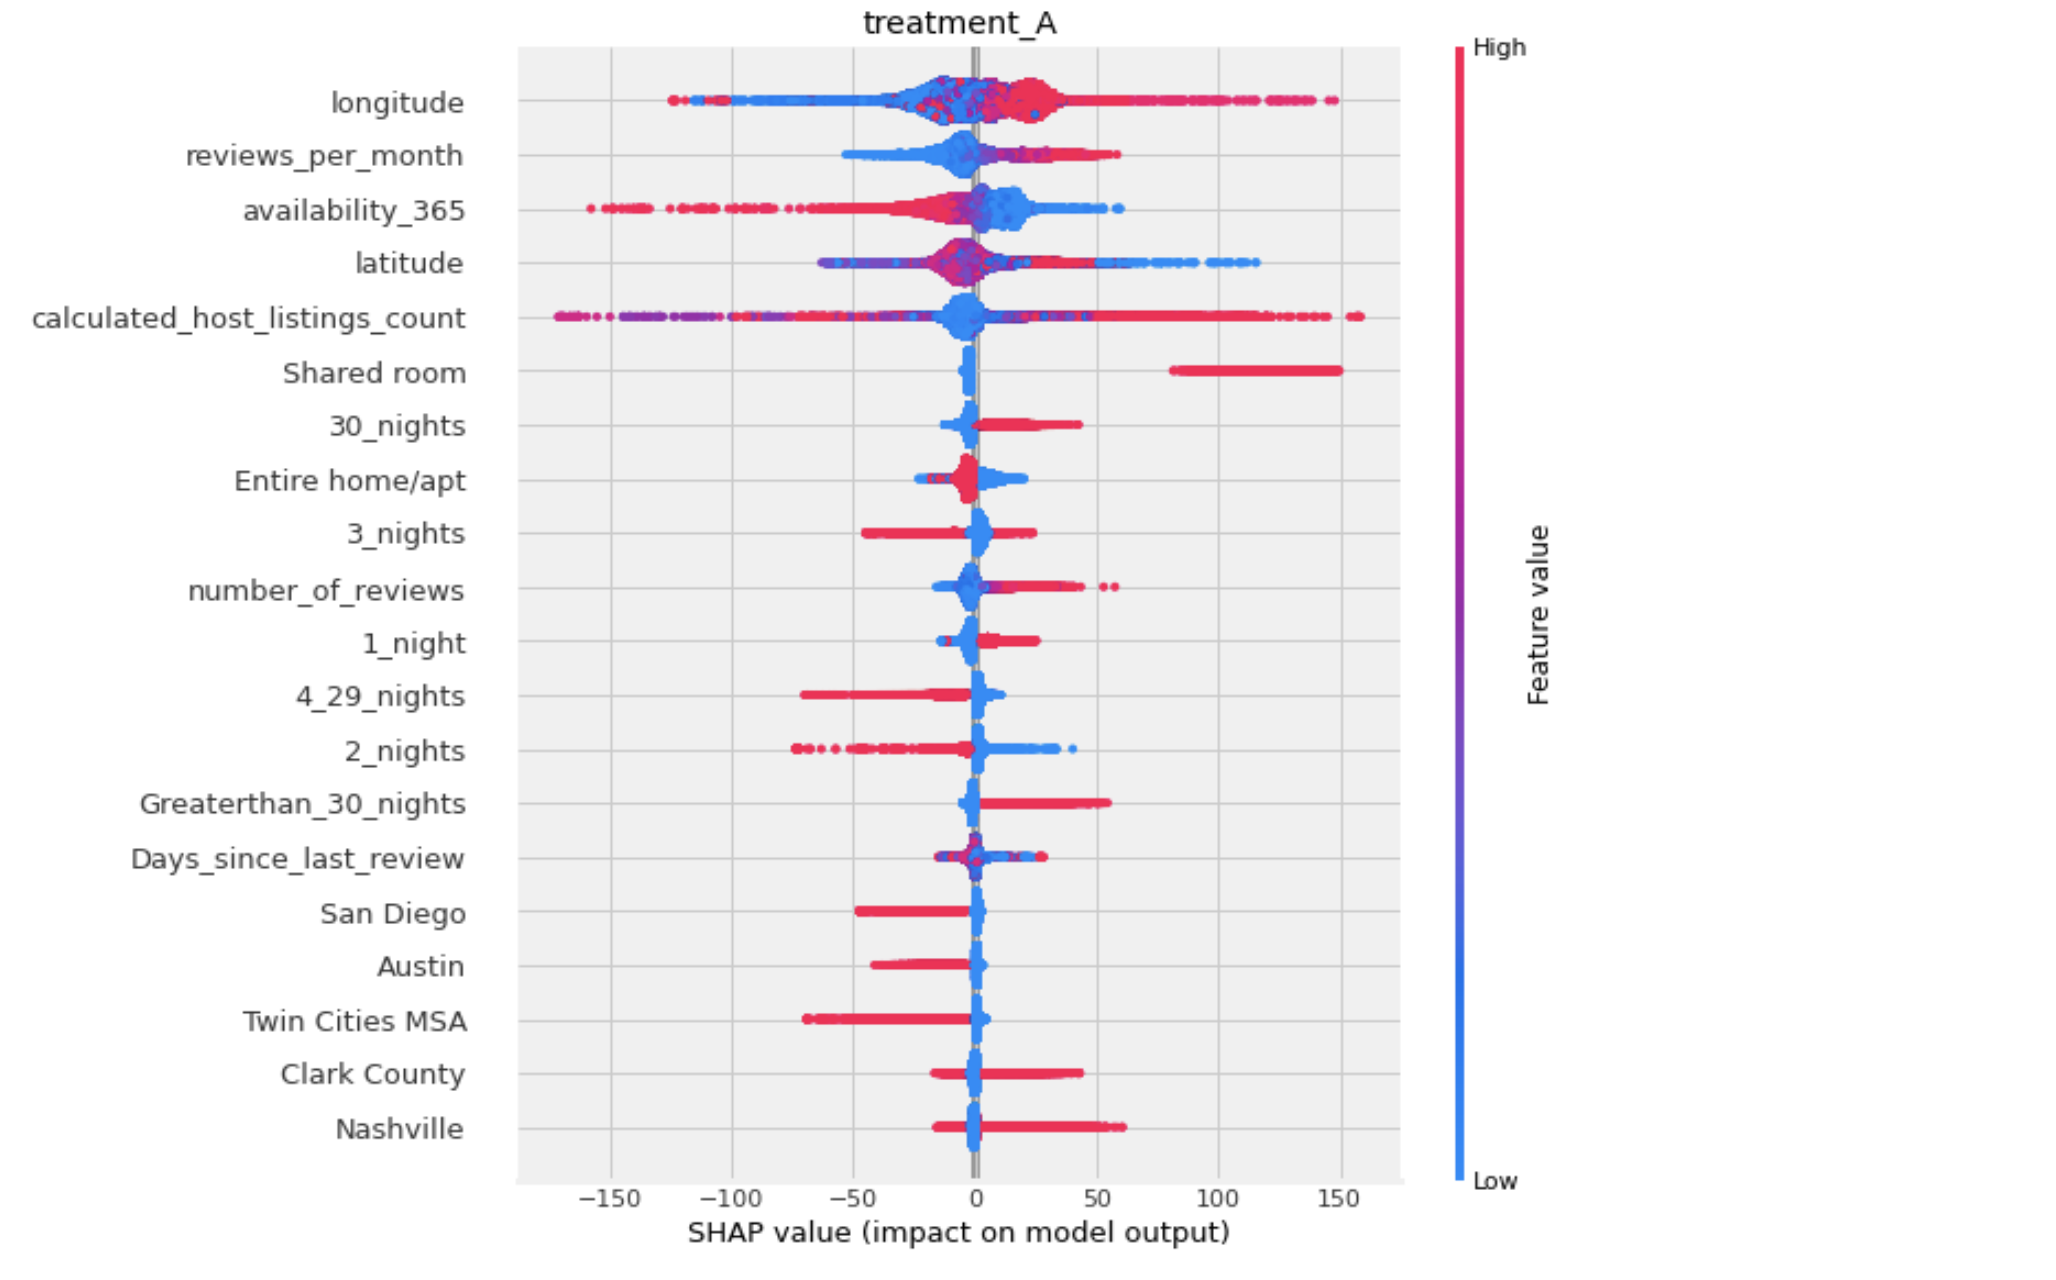

We will illustrate how to interpret this plot by interpreting the Reviews Per Month for example. 

Feature values get larger going from blue to red. And the vertical axis (SHAP value =0) is separating whether the feature has a negative or positive effect on the treatment effect.

To the right of the vertical axis, we can see Reviews per Month is positive and high as it is mostly red. This means higher reviews per month has a postive impact on the model output, which is treatment effect. Since our original ATE is -90, positive impact means this number is getting less negative. In other words, when a listing is popular with many reviews per month, the difference between treament and control (i.e., whether it is a private room or else) is getting smaller.


This is confirmed by our daily observation. Once an airbnb listing is so popular, people ignores certain conditions such as the room type. This implies that for private room listing owners, if they want to rent their listing at a higher price, they need to increase their listing's reviews and popularity. 